In [14]:
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [16]:
%reload_ext watermark
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [17]:
df_mod = pd.read_csv("dataset.csv")

In [18]:
df_mod.shape

(500, 8)

In [19]:
df_mod.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


In [20]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Mouse             500 non-null    object 
 1   Medicamento          500 non-null    object 
 2   Sexo                 500 non-null    object 
 3   Idade_Meses          500 non-null    int64  
 4   Peso (g)             500 non-null    int64  
 5   Timepoint            500 non-null    int64  
 6   Tumor Volume (mm3)   500 non-null    float64
 7   Sitios Metastáticos  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [21]:
df_mod.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [22]:
df_mod["ID Mouse"].nunique()

100

In [23]:
df_mod.isna().any()

ID Mouse               False
Medicamento            False
Sexo                   False
Idade_Meses            False
Peso (g)               False
Timepoint              False
Tumor Volume (mm3)     False
Sitios Metastáticos    False
dtype: bool

In [24]:
duplicate_ID = df_mod.loc[df_mod.duplicated(subset = ["ID Mouse", "Timepoint"]), "ID Mouse"].unique()

In [25]:
df_mod_final = df_mod[df_mod["ID Mouse"].isin(duplicate_ID) == False]

In [26]:
df_mod.shape

(500, 8)

In [27]:
df_mod_final.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


In [28]:
df_mod_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [29]:
df_mod_final_agrupado = df_mod_final.groupby("Medicamento")["Tumor Volume (mm3)"]

In [30]:
media = df_mod_final_agrupado.mean()
mediana = df_mod_final_agrupado.median()
variancia = df_mod_final_agrupado.var()
desvio_padrao = df_mod_final_agrupado.std()
sem = df_mod_final_agrupado.sem()

In [31]:
df_sumario_estatistico = pd.DataFrame({'Média': media, 
                                       'Mediana': mediana, 
                                       'Variância': variancia, 
                                       'Desvio Padrão': desvio_padrao,
                                       'SEM': sem})

In [32]:
df_sumario_estatistico

,Média,Mediana,Variância,Desvio Padrão,SEM
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


In [33]:
sumario_agregado = df_mod_final_agrupado.agg(["mean", "median", "var", "std", "sem"])

In [34]:
sumario_agregado

,mean,median,var,std,sem
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


In [35]:
df_mod_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [36]:
df_mod_final["Medicamento"].value_counts()

Ramicane     133
Placebo      126
Capomulin    124
Infubinol    117
Name: Medicamento, dtype: int64

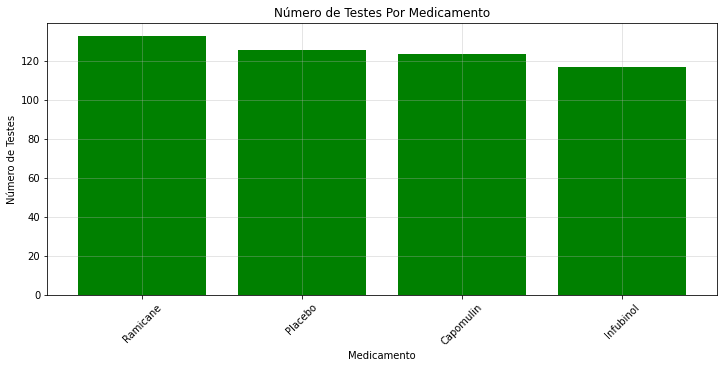

In [37]:
plt.figure(figsize = (12, 5)) 
x_axis = df_mod_final["Medicamento"].value_counts().index.values
y_axis = df_mod_final["Medicamento"].value_counts().values
plt.bar(x_axis, y_axis, color = "green")
plt.title("Número de Testes Por Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Número de Testes")
plt.grid(alpha = 0.4)
plt.xticks(rotation = 45)
plt.show()

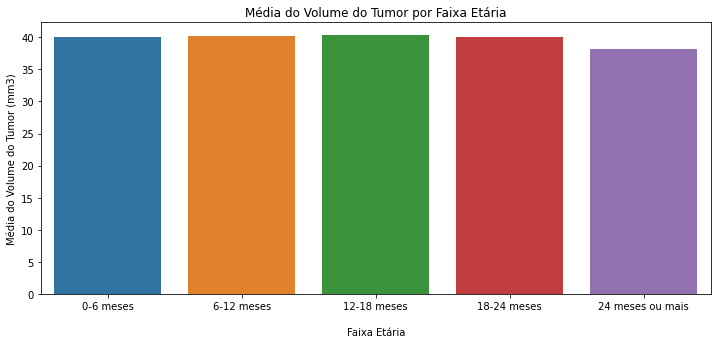

In [38]:
bins = [0, 6, 12, 18, 24, 30]  
labels = ['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24 meses ou mais']

df_mod_final['faixa_etaria'] = pd.cut(df_mod_final['Idade_Meses'], 
                                      bins = bins, 
                                      labels = labels, 
                                      right = False)

media_tumor = df_mod_final.groupby('faixa_etaria')['Tumor Volume (mm3)'].mean().reset_index()

import seaborn as sns
plt.figure(figsize = (12, 5)) 
sns.barplot(x = 'faixa_etaria', y = 'Tumor Volume (mm3)', data = media_tumor)
plt.title('Média do Volume do Tumor por Faixa Etária')
plt.xlabel('\nFaixa Etária')
plt.ylabel('Média do Volume do Tumor (mm3)')
plt.show()

In [39]:
df_mod_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos',
       'faixa_etaria'],
      dtype='object')

In [40]:
Capomulin_df = df_mod_final.loc[df_mod_final["Medicamento"] == "Capomulin",:]
Ramicane_df = df_mod_final.loc[df_mod_final["Medicamento"] == "Ramicane", :]
Infubinol_df = df_mod_final.loc[df_mod_final["Medicamento"] == "Infubinol", :]
Ceftamin_df = df_mod_final.loc[df_mod_final["Medicamento"] == "Ceftamin", :]

In [41]:
Capomulin_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [42]:
Capomulin_last = Capomulin_df.groupby('ID Mouse').max()['Timepoint']

In [43]:
Capomulin_last

ID Mouse
m000    15
m002     5
m003    15
m004    20
m005    15
        ..
m094    10
m095    20
m096    20
m097     0
m098    20
Name: Timepoint, Length: 76, dtype: int64

In [44]:
Capomulin_volume = pd.DataFrame(Capomulin_last)

In [45]:
Capomulin_merge = pd.merge(Capomulin_volume, Capomulin_df, on = ("ID Mouse", "Timepoint"), how = "left")

In [46]:
Capomulin_merge.head()

,ID Mouse,Timepoint,Medicamento,Sexo,Idade_Meses,Peso (g),Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,15,Capomulin,Feminino,21,23,38.578206,2,18-24 meses
1,m002,5,Capomulin,Feminino,5,15,42.618402,0,0-6 meses
2,m003,15,Capomulin,Feminino,8,19,38.578974,0,6-12 meses
3,m004,20,Capomulin,Masculino,6,28,39.716441,2,6-12 meses
4,m005,15,Capomulin,Masculino,16,27,40.130019,2,12-18 meses


In [47]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

In [48]:
Cap_quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])

In [49]:
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]

In [50]:
Cap_iqr = Cap_upperq - Cap_lowerq

In [51]:
Cap_lowerbound = Cap_lowerq - (Cap_iqr * 1.5)
Cap_upperbound = Cap_upperq + (Cap_iqr * 1.5)

In [52]:
print(f"Primeiro Quartil da Medida do Tumor com Capomulin: {Cap_lowerq}")
print(f"Terceiro Quartil da Medida do Tumor com Capomulin: {Cap_upperq}")
print(f"Intervalo Interquartil (IQR): {Cap_iqr}")
print(f"Valores Abaixo de {Cap_lowerbound} podem ser outliers")
print(f"Valores Acima de {Cap_upperbound} podem ser outliers")

Primeiro Quartil da Medida do Tumor com Capomulin: 35.58718855604685
Terceiro Quartil da Medida do Tumor com Capomulin: 41.07860879053021
Intervalo Interquartil (IQR): 5.491420234483364
Valores Abaixo de 27.3500582043218 podem ser outliers
Valores Acima de 49.315739142255254 podem ser outliers


In [53]:
last_timepoint = pd.DataFrame(df_mod_final.groupby('ID Mouse')['Timepoint'].max().sort_values()) \
                    .reset_index().rename(columns = {'Timepoint': 'max_timepoint'})

In [54]:
last_timepoint.head()

,ID Mouse,max_timepoint
0,m000,20
1,m072,20
2,m071,20
3,m070,20
4,m069,20


In [55]:
merged_df = pd.merge(df_mod_final, last_timepoint, on = "ID Mouse")

In [56]:
merged_df.shape

(500, 10)

In [57]:
merged_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria,max_timepoint
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses,20
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais,20
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,18-24 meses,20
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses,20
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,12-18 meses,20


In [58]:
df_mod_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos',
       'faixa_etaria'],
      dtype='object')

In [59]:
tumor_volume = []

In [60]:
lista_medicamentos = ["Capomulin", "Ramicane", "Infubinol", "Placebo"]

In [61]:
print(f"\nRelatório Estatístico de Outliers")

for medicamento in lista_medicamentos:

    mod_dados = merged_df.loc[merged_df["Medicamento"] == medicamento]

    final_volume = mod_dados.loc[mod_dados["Timepoint"] == mod_dados["max_timepoint"]]

    final_volumes = final_volume["Tumor Volume (mm3)"]

    tumor_volume.append(final_volumes)

    quartiles = final_volumes.quantile([0.25,.5,0.75])

    lowerq = quartiles[0.25]

    upperq = quartiles[0.75]
 
    iqr = upperq - lowerq

    lower_bound =  lowerq - (1.5 * iqr)

    upper_bound = upperq +(1.5 * iqr)
   
    outliers = final_volumes[(final_volume["Tumor Volume (mm3)"] <= lower_bound) | \
                             (final_volume["Tumor Volume (mm3)"] >= upper_bound)].count()

    print(f"\nIQR Para {medicamento}: {iqr}")
    print(f"Limite Inferior Para {medicamento}: {lower_bound}")
    print(f"Limite Superior Para {medicamento}: {upper_bound}")
    print(f"Medicamento: {medicamento} -> Número de outliers: {outliers}")


Relatório Estatístico de Outliers

IQR Para Capomulin: 4.852178469471447
Limite Inferior Para Capomulin: 25.767389137683136
Limite Superior Para Capomulin: 45.17610301556893
Medicamento: Capomulin -> Número de outliers: 0

IQR Para Ramicane: 5.003897167188235
Limite Inferior Para Ramicane: 26.055360480530023
Limite Superior Para Ramicane: 46.07094914928297
Medicamento: Ramicane -> Número de outliers: 0

IQR Para Infubinol: 3.8793474601479048
Limite Inferior Para Infubinol: 26.74425645494983
Limite Superior Para Infubinol: 42.26164629554145
Medicamento: Infubinol -> Número de outliers: 0

IQR Para Placebo: 5.16298824225909
Limite Inferior Para Placebo: 24.757630535846673
Limite Superior Para Placebo: 45.40958350488303
Medicamento: Placebo -> Número de outliers: 0


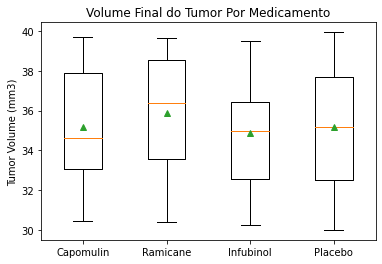

In [62]:
format = dict(marker = "o")
plt.boxplot(tumor_volume, flierprops = format, showmeans = True)
plt.title("Volume Final do Tumor Por Medicamento")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Placebo"])
plt.show()

In [63]:
df_mod_final.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,18-24 meses
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,12-18 meses


In [64]:
tratamento_mouse = df_mod_final.loc[df_mod_final["ID Mouse"] == "m000"]

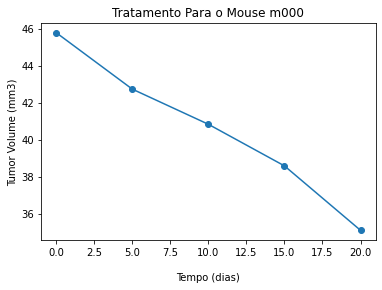

In [65]:
plt.plot(tratamento_mouse['Timepoint'], tratamento_mouse["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("\nTempo (dias)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tratamento Para o Mouse m000")
plt.show()

In [66]:
capomulin_treatment = df_mod_final.loc[df_mod_final["Medicamento"] == "Capomulin"]

In [67]:
capomulin_treatment.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [68]:
capomulin_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 3 to 494
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Mouse             124 non-null    object  
 1   Medicamento          124 non-null    object  
 2   Sexo                 124 non-null    object  
 3   Idade_Meses          124 non-null    int64   
 4   Peso (g)             124 non-null    int64   
 5   Timepoint            124 non-null    int64   
 6   Tumor Volume (mm3)   124 non-null    float64 
 7   Sitios Metastáticos  124 non-null    int64   
 8   faixa_etaria         124 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 9.0+ KB


In [69]:
avg_tumor_volume = capomulin_treatment.groupby('ID Mouse')[['Idade_Meses', 
                                                            'Peso (g)', 
                                                            'Timepoint', 
                                                            'Tumor Volume (mm3)', 
                                                            'Sitios Metastáticos']].mean()

In [70]:
avg_tumor_volume.head()

,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
ID Mouse,,,,,
m000,21.0,23.0,15.0,38.578206,2.0
m002,5.0,15.0,5.0,42.618402,0.0
m003,8.0,19.0,15.0,38.578974,0.0
m004,6.0,28.0,20.0,39.716441,2.0
m005,16.0,27.0,15.0,40.130019,2.0


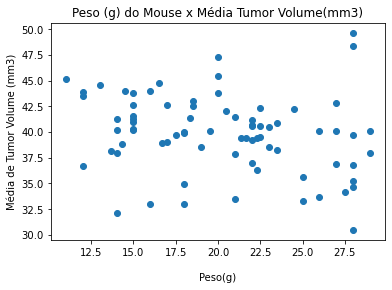

In [71]:
x_values = avg_tumor_volume["Peso (g)"]
y_values = avg_tumor_volume["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Peso (g) do Mouse x Média Tumor Volume(mm3)")
plt.xlabel("\nPeso(g)")
plt.ylabel("Média de Tumor Volume (mm3)")
plt.show()

In [72]:
correlation_model = st.pearsonr(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
print(f"A correlação entre Peso (g) e Tumor Volume (mm3) é de {round(correlation_model[0],2)}")

A correlação entre Peso (g) e Tumor Volume (mm3) é de -0.22


In [73]:
modelo = st.linregress(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"])

In [74]:
modelo.intercept

43.16169061490729

In [75]:
modelo.slope

-0.1630336009971833

In [76]:
modelo_mod = modelo.intercept + modelo.slope * avg_tumor_volume["Peso (g)"]

In [77]:
line_equation = f"y={round(modelo.slope, 2)}x + {round(modelo.intercept, 2)}"

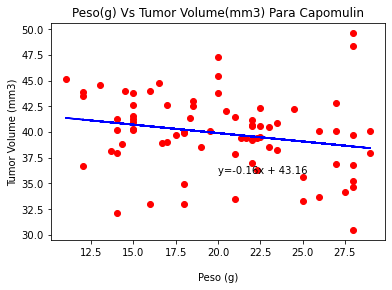

In [78]:
plt.scatter(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color = "r")
plt.plot(avg_tumor_volume["Peso (g)"], modelo_mod, color = "blue")
plt.xlabel("\nPeso (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Peso(g) Vs Tumor Volume(mm3) Para Capomulin")
plt.annotate(line_equation, (20,36))
plt.show();

In [79]:
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [80]:
#%watermark -v -m

In [81]:
#%watermark --iversions